In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.shape

(381109, 12)

In [5]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
test.shape

(127037, 11)

Joining the two data frames

In [13]:
train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [18]:
combined=pd.concat([train,test])
combined

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN


In [19]:
combined.shape

(508146, 12)

In [20]:
combined.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

# Preprocessing the data

In [21]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [22]:
data=train.copy()

In [24]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [25]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [26]:
data=data.drop(['id'],axis=1)

In [27]:
data.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [29]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

We have to convert the Vehicle_Age from object to float

In [35]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [31]:
data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [37]:
data['Vehicle_Age']=data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
data['Vehicle_Age'].head()

0    2
1    1
2    2
3    0
4    0
Name: Vehicle_Age, dtype: int64

In [38]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [39]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [40]:
data.shape

(381109, 11)

In [41]:
data.corr(method='pearson')

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,0.043778,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,-0.380873,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.041580,-0.550663,-0.001892,0.221874
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,0.041580,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.221874,0.022575,-0.139042,-0.001050,1.000000


# Correlation Matrix

<AxesSubplot:>

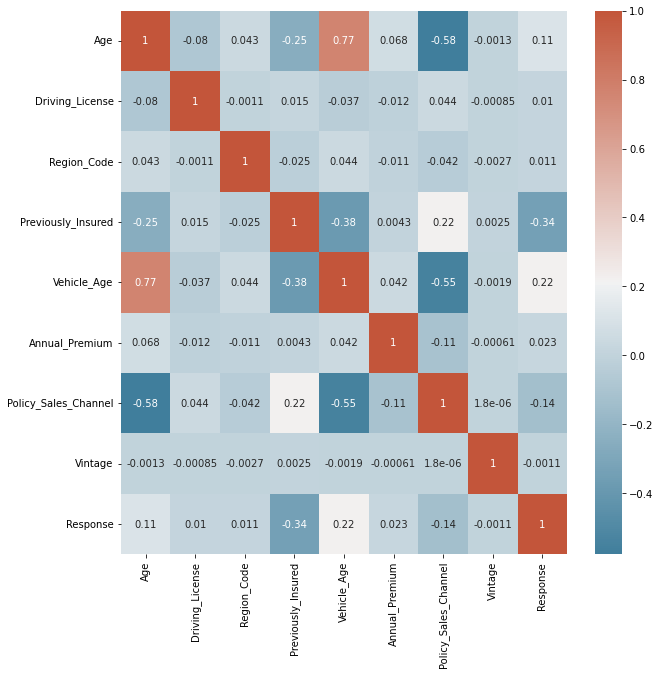

In [50]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(),annot=True,cmap=cmap)

Sales of the policy

In [51]:
data['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [86]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,0.609616,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,0.567439,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,2.000000,540165.000000,163.000000,299.000000,1.000000


In [87]:
data.var()

C:\Users\pushpa\AppData\Local\Temp/ipykernel_7112/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Age                     2.406101e+02
Driving_License         2.126090e-03
Region_Code             1.750299e+02
Previously_Insured      2.482543e-01
Vehicle_Age             3.219875e-01
Annual_Premium          2.962927e+08
Policy_Sales_Channel    2.938073e+03
Vintage                 7.000887e+03
Response                1.075419e-01
dtype: float64

# Data is separated into independent and dependent features

In [52]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [53]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1,No,33536.0,26.0,183
2,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,0,No,28619.0,152.0,203
4,Female,29,1,41.0,1,0,No,27496.0,152.0,39


In [54]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

# Spliting the data into train & test

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
                                                x,                 #x column values
                                                y,                 #y column values
                                                test_size=0.33,    #split of the data
                                                random_state=20    # random state for repeatibility
                                               )

# Modules required for make column transform

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

In [65]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

# Importing the Classification Model

We are using 

LINEAR MODEL-LogisticRegression

NON LINEAR MODEL-KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

# Building the Model

# Logistic Regression

In [69]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

step2=LogisticRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

Accuracy Score: 0.87817057074249
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    110444
           1       0.00      0.00      0.00     15322

    accuracy                           0.88    125766
   macro avg       0.44      0.50      0.47    125766
weighted avg       0.77      0.88      0.82    125766



C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

<AxesSubplot:>

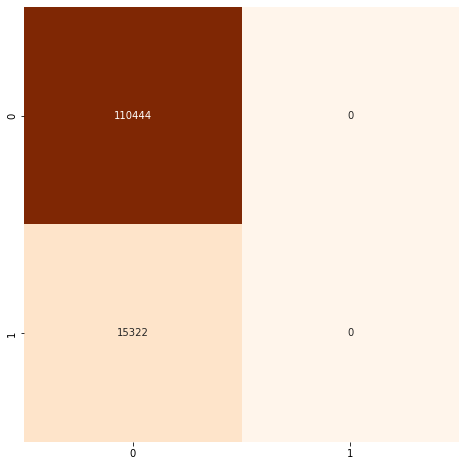

In [88]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,square=True,annot=True,cmap='Oranges',fmt='d',cbar=False)

# Decision Tree Classifier

In [89]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

step2=DecisionTreeClassifier()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.8227899432278994
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    110444
           1       0.29      0.30      0.29     15322

    accuracy                           0.82    125766
   macro avg       0.59      0.60      0.60    125766
weighted avg       0.83      0.82      0.83    125766



# AdaBoost Classifier

In [90]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

step2=AdaBoostClassifier(n_estimators=20)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.87817057074249
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    110444
           1       0.00      0.00      0.00     15322

    accuracy                           0.88    125766
   macro avg       0.44      0.50      0.47    125766
weighted avg       0.77      0.88      0.82    125766



C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pushpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [91]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

step2=RandomForestClassifier(n_estimators=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.8637628611866482
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    110444
           1       0.35      0.13      0.19     15322

    accuracy                           0.86    125766
   macro avg       0.62      0.55      0.56    125766
weighted avg       0.82      0.86      0.84    125766



# KNeighbors Classifier

In [92]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,6])],remainder='passthrough')

step2=KNeighborsClassifier(n_neighbors=5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.8582764817200197
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    110444
           1       0.20      0.06      0.09     15322

    accuracy                           0.86    125766
   macro avg       0.54      0.51      0.51    125766
weighted avg       0.80      0.86      0.82    125766



# Making data into dump using pickle

In [93]:
import pickle

In [94]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [95]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1,No,33536.0,26.0,183
2,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,0,No,28619.0,152.0,203
4,Female,29,1,41.0,1,0,No,27496.0,152.0,39


In [96]:
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [100]:
data.to_csv('vehicle_insurance.csv')

In [101]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 6])])),
                ('step2', KNeighborsClassifier())])